# YOLO Object Detection

Testing out detection algorithms to implement. 

### Dependencies and Functions

In [7]:
from track_almost_anything.api.processing.config.torch_backends import TorchBackend
from track_almost_anything.api.io.image_io import get_image_sequence_config_from_dir

%matplotlib inline
import torch
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def load_image(image_path):
    """Load an image using OpenCV."""
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_yolo_model(device):
    """Load a pretrained YOLOv5 model."""
    # Load YOLOv5s (small) model
    model = torch.hub.load("ultralytics/yolov5", "yolov5s")
    model.to(device)
    return model


def detect_objects(model, image_path):
    """Detect objects using YOLOv5."""
    # Perform inference
    results = model(image_path)
    return results


def visualize_results(image, results):
    """Visualize detected objects."""
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    detections = results.xyxy[0].cpu().numpy()  # Get detections for the first image
    for *box, conf, cls in detections:
        x1, y1, x2, y2 = box
        conf = float(conf)
        cls = int(cls)
        label = results.names[cls]

        # Draw the bounding box
        rect = Rectangle(
            (x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="red", facecolor="none"
        )
        ax.add_patch(rect)

        # Add the label and confidence score
        label_text = f"{label}: {conf:.2f}"
        ax.text(
            x1,
            y1 - 5,
            label_text,
            color="white",
            fontsize=10,
            bbox=dict(facecolor="red", alpha=0.5),
        )

    plt.axis("off")
    plt.show()
    print(f"Image shape: {image.shape}")
    print("Image shown")


### Yolov5

Using cache found in /Users/larsdelbubba/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-16 Python-3.11.10 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


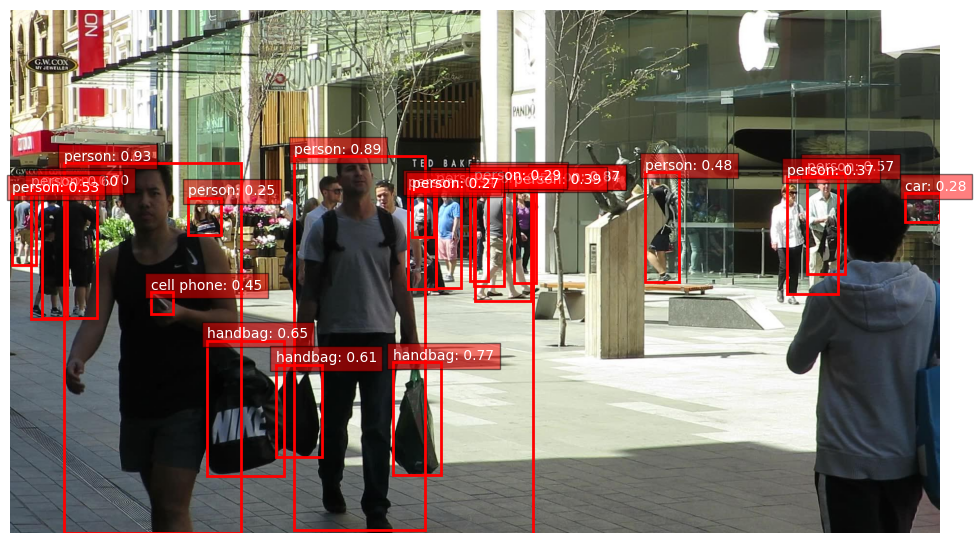

Image shape: (1080, 1920, 3)
Image shown


In [9]:
torch_backend = TorchBackend()
device = torch_backend.get()

image_path = "/Users/larsdelbubba/Desktop/Coding Projects/track-almost-anything_resources/Video/MOT17/test/MOT17-08-DPM/img1/000004.jpg"
image = load_image(image_path)

model = get_yolo_model(device)

results = detect_objects(model, image_path)

visualize_results(image, results)